In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from scipy.stats import truncnorm

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [2]:
img = cv2.imread(r"C:\Users\dkess\OneDrive\Documents\CWRU\Macro\Python\Macro-Citizen-Science\images\beta-sample\IMG_3070.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get mm to pixel scale factor
image_dimensions = [6, 8]  # height, width of image in inches
inch_to_mm_conversion = 25.4
pix_height, pix_width, _ = img.shape
true_height = image_dimensions[0] * inch_to_mm_conversion
true_width = image_dimensions[1] * inch_to_mm_conversion
mm_per_pixel = true_height / pix_height

In [23]:
# Draw ellipse on a blank, white image
white = 255 * np.ones((2765, 3687, 3), np.uint8)

center_coords = (int(img.shape[1]/2), int(img.shape[0]/2))
m = int(3/mm_per_pixel)
M = int(2*m)
axes_lengths = (m, M)
angle = 60
start_angle = 0
end_angle = 360
color = (0, 0, 0)
ellipse = cv2.ellipse(white, center_coords, axes_lengths, angle, start_angle, end_angle, color, thickness=-1,lineType=cv2.LINE_AA)

# Get all non-white pixels (the ones corresponding to the ellipse)
rows, cols, channel = np.where(ellipse == 0)

In [24]:
def get_truncated_normal(mean, sd, lower, upper):
    return truncnorm(
        (lower - mean) / sd, (upper - mean) / sd, loc=mean, scale=sd)

# Normal distribution, cut-off at 0 (below which pixels would be white)
d = get_truncated_normal(mean=0, sd=25, lower=0, upper=130)

# Generate list of normally distributed values
d_list = d.rvs(len(rows))

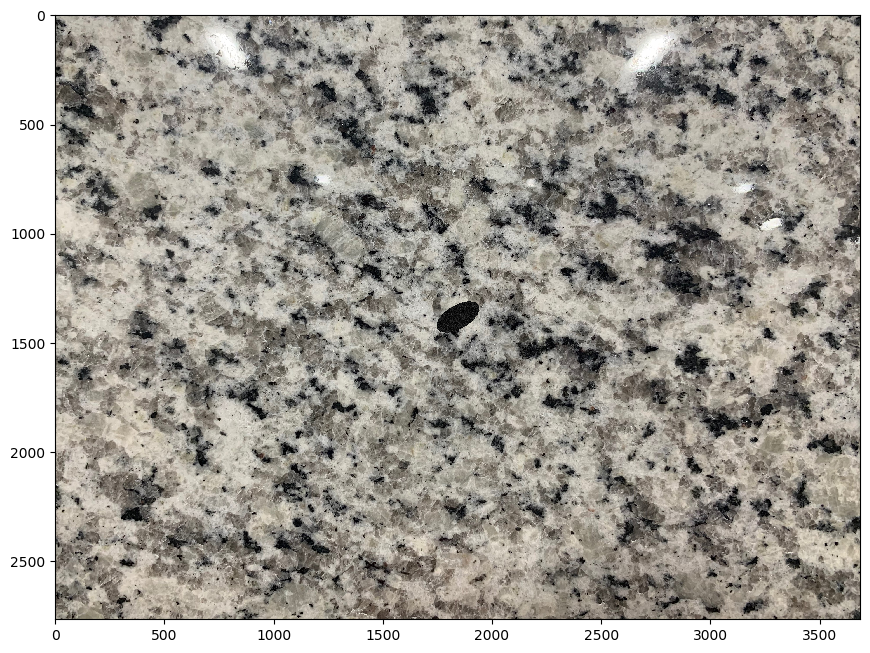

In [25]:
# Reload image for testing
img = cv2.imread(r"C:\Users\dkess\OneDrive\Documents\CWRU\Macro\Python\Macro-Citizen-Science\images\beta-sample\IMG_3070.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Color each ellipse pixel according to the normal distribution
for i in range (len(rows)):
    c = d_list[i]
    img[rows[i],cols[i]] = [c, c, c]
    
plt.imshow(img)